<a href="https://colab.research.google.com/github/BU-BME-DataSci-ML/Spring-2023/blob/main/Homework1/Homework1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load libraries that we will be using for analysis

Notes:

Distributions.  Normal distribution.  Central limit theorem.  All gaussians are the same shape but have different means and variances

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Load data

In [2]:
from numpy import genfromtxt
HeightsAndWeights = genfromtxt('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/SOCR-HeightWeight.csv', delimiter=',')


Lets plot some things that allow us to get a sense of our data

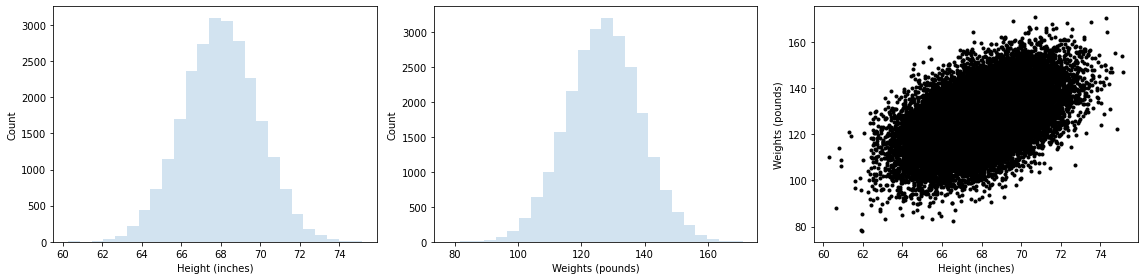

In [3]:
heights = HeightsAndWeights[1:,1]
weights = HeightsAndWeights[1:,2]

meanHeight = np.mean(heights)
stdHeight = np.std(heights, ddof=1)

fig, ax = plt.subplots(1, 3)
ax[0].hist(heights, density=False, bins = 25, histtype='stepfilled', alpha=0.2)
ax[1].hist(weights, density=False, bins = 25, histtype='stepfilled', alpha=0.2)
ax[2].plot(heights, weights, 'k.')

ax[0].set(xlabel='Height (inches)')
ax[0].set(ylabel='Count')

ax[1].set(xlabel='Weights (pounds)')
ax[1].set(ylabel='Count')

ax[2].set(xlabel='Height (inches)')
ax[2].set(ylabel='Weights (pounds)')

fig.set_size_inches(16, 4)
plt.tight_layout()


Are heights normally distributed?  No statistical tests here, lets just take a look by eye

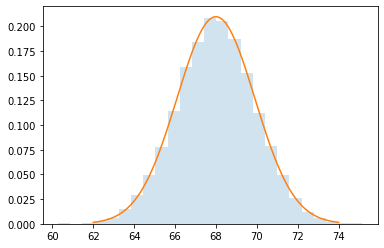

In [127]:

plt.hist(heights, density=True, bins = 25, histtype='stepfilled', alpha=0.2)

xmin = 62.
xmax = 74.
x = np.arange(xmin, xmax, 0.01)
heightDist = stats.norm(meanHeight, stdHeight)
prob = heightDist.pdf(x)
plt.plot(x, prob);

Seems so!

Now, suppose someone walks into your casino that is 5'4."  What is the chance that they are 18 years old based solely on their height?

First, lets see where this individual falls in our distribution

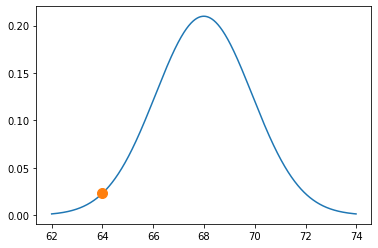

In [130]:
individualHeight = 64
plt.plot(x, prob)
plt.plot(individualHeight, heightDist.pdf(individualHeight), '.', markersize=20);

How far away from the mean of this distribution is this measurement?

In [131]:
print("Individual is " + str(meanHeight-individualHeight) + " shorter than average")

Individual is 3.9931135967999865 shorter than average


Is this a lot?  It is much easier to think about this in terms of the width of the distribution - the standard deviation.  

How far is the measurement from the mean of the distribution in terms of standard deviations?

In [132]:
z = (individualHeight-meanHeight)/stdHeight

print(z)

-2.099783442536126


This individual's height is ~2 standard deviations below the mean.  This is called a z-score.  This measurement has a z-score of about -2.

If we apply the same math to our original distribution of heights, we end up with a standard normal distribution with mean 0 and standard deviation 1.

We can see where our measurement falls.  This looks the same as above, but has been converted to a normalized distribution.

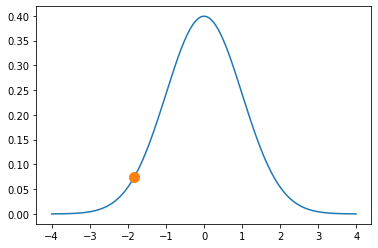

In [11]:
normmu = 0.
normsd = 1.

xmin = -4.
xmax = 4.
x = np.arange(xmin, xmax, 0.01)

normDist = stats.norm(normmu, normsd)
normDistPdf = normDist.pdf(x)

plt.plot(x, normDistPdf)
plt.plot(z, normDist.pdf(z), '.', markersize=20);


What is the likelihood that if we measure the height of an 18 year old, it will be 5'4" or less?

0.03311544086553725


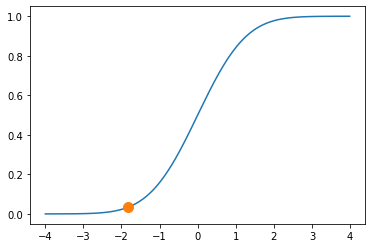

In [13]:
normDistCdf = normDist.cdf(x)

plt.plot(x, normDistCdf);
plt.plot(z, normDist.cdf(z), '.', markersize=20)

Lets zoom in

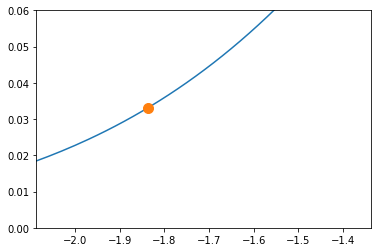

In [16]:
plt.plot(x, normDistCdf);
plt.plot(z, normDist.cdf(z), '.', markersize=20)

plt.xlim(z-0.25, z+0.5)
plt.ylim(0., 0.06);

We can calculate this value directly in Python

In [136]:
p = normDist.cdf(z)
print("There is a " + str(p*100) + "% chance of randomly sampling a value of " + str(individualHeight) + " inches or smaller from our dataset of 18 year olds")


There is a 1.7873947704907887% chance of randomly sampling a value of 64 inches or smaller from our dataset of 18 year olds
